## Example calls of environment_mod routines

In [1]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt
import const
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/../")
sys.path.append(fpath)

### 1. environment_mod.Bmag_dipole

Routine to calculate the geomagnetic dipole field strength

We assume a centered dipole model for the Earth’s magnetic field. The components of B can be written as [Walt,1994]:
$$B_r=-2B_0 \frac{R_e^3}{r^3}sin \lambda  $$
$$ B_{\lambda}=B_0\frac{R_e^3}{r^3}cos \lambda  $$
$$B_{\theta}=0$$
and:
$$B=\sqrt{B_r^2+B_{\lambda}^2}=B_0\frac{R_e^3}{r^3} \sqrt{1+3sin^2\lambda}$$
where $r$ and $\lambda$ are the geocentric radial distance and latitude respectively, $R_e$ is the
Earth’s radius (∼ 6370 km), and $B_0$ is the mean value of the field on the equator at
the Earth’s surface ∼ $3.12 × 10^{−5} T$. The geomagnetic field described in this way is
a good approximation to the real field, since our region of interest $(L \approx  2−5)$ is far
enough away from the Earth’s surface for the rapidly decaying higher order terms
to become insignificant, and yet sufficiently close to remain unaltered by solar wind
deformation, and other external current systems (e.g., the ring current, magnetopause
current).In a centered dipole magnetic field model, the path along a given L shell can be described as:
$$r=R_e L\cos^2 \lambda$$
subsituting in the expression for the magnetic field intensity, we get:
$$ B=B_0\frac{R_e^3}{(R_e L\cos^2 \lambda)^3} \sqrt{1+3sin^2\lambda}=B_0 \frac{1}{L^3} \frac{\sqrt{1+3sin^2\lambda}}{\cos^6 \lambda}$$

**Inputs**:

L_arg: L shell

lamda_arg: geomagnetic latitude in rad

**Outputs**:

Geomagnetic field in T

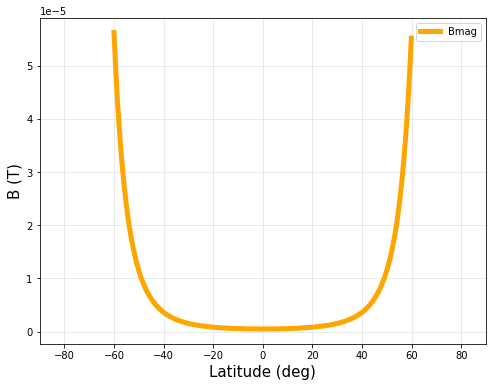

In [2]:
from environment_mod import Bmag_dipole

lats_deg = np.arange(-60,60,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4

Bmag=Bmag_dipole(L_shell,lats_rad)

#####Plot######
fig, ax = plt.subplots(figsize=(8,6))
s=5
fonts=15
ax.plot(lats_deg,Bmag,c='orange',label='Bmag',linewidth=s)

ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'B (T)',fontsize=fonts)
ax.legend()


plt.show()


### 2. environment_mod.carpender_anderson

[Carpenter, D. L., and R. R. Anderson. "An ISEE/whistler model of equatorial electron density in the magnetosphere." Journal of Geophysical Research: Space Physics 97.A2 (1992): 1097-1108.]

a. Plasmapause inner limit $L_{ppi}$:
$$L_{ppi}=5.6-0.46Kp_{max}$$

where $Kp_{max}$ is the maximum Kp value in the preceding 24 hours.
b. The saturated plasmasphere segment for $2.25 \leq L \leq L_{ppi} $:

$$ log_{ne}=(-0.3145L+3.9043)+[0.15(cos\frac{2\pi(d+9)}{365}-0.5 cos\frac{4\pi(d+9)}{365})+0.00127 \bar{R} -0.0635] e^{-\frac{L-2}{1.5}}$$

c. The plasmapause segment for $L_{ppi} \leq L \leq L_{ppo}$:

\begin{equation}
  ne=\begin{cases}
    n_e(L_{ppi}) 10 ^{-\frac{L-L_{ppi}}{0.1}}& 00\leq t < 06 MLT \\
    n_e(L_{ppi}) 10 ^{-\frac{L-L_{ppi}}{0.1+0.011(t-6)}}& 06\leq t \leq 15 MLT
  \end{cases}
\end{equation}


d. The extended plasma trough for $2.25 \leq L \leq 8$:
\begin{equation}
  ne=\begin{cases}
   (5800+300t)L^{-4.5}+(1-e^{-\frac{L-2}{10}})& 00\leq t < 06 MLT \\
    (-800+1400t)L^{-4.5}+(1-e^{-\frac{L-2}{10}})& 06\leq t \leq 15 MLT
  \end{cases}
\end{equation}

e. The plasmapuse outer limit $L_{ppo}$, determined by solving simultaneously for the plasmapause segment and the extended plasma trough.

f. The plasma trough segment for $L_{ppo} \leq L \leq 8$:
$$ne=ne(L_{ppo})(\frac{L}{L_{ppo}})^{-4.5}+(1-e^{-\frac{L-2}{10}})$$


**Inputs**:

Lsh: L shell

Kpmax: the maximum Kp value in the preceding 24 hours

day: the day number

mlt: the magnetic local time

Rb: the 13-month average sunspot number

**Outputs**:

ne_eq: equatorial electron density


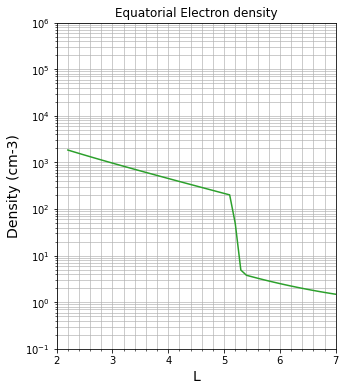

In [3]:
from environment_mod import carpender_anderson

Lshell=np.arange(2.2,8,0.1)
Kpmax=1
day=0
mlt=2
Rsun=90

ne_final=[]

for i in range(0,len(Lshell)):
    ne_tmp=carpender_anderson(Lshell[i],Kpmax,day,mlt,Rsun)
#     print(ne_tmp)
    ne_final.append(ne_tmp)


###Plot##############################################
fig, ax = plt.subplots(figsize=(5,6))
s=5
ax.set_title('Equatorial Electron density')
ax.set_xlabel("L",fontsize=14)
ax.set_ylabel("Density (cm-3)",fontsize=14)

ax.plot(Lshell,ne_final,color="tab:green")

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_ylim([10**(-1), 10**6])
ax.set_xlim([2,7])
ax.grid(True, which="both",alpha=.8)
plt.show()
###########################################################

### 3. environment.densities_denton
Routine to calculate the electron density along a magnetic field line after [Denton et al., 2002]

$$n_e=n_{eq}\cos^{-4}\lambda$$



**Inputs**:

ne0_arg: electron number density

lamda_arg: geomagnetic latitude in rad



**Outputs**:

n_e_tmp: electron number density


*Denton, R. E., J. Goldstein, and J. D. Menietti (2002), Field line depen-
dence of magnetospheric electron density, Geophys. Res. Lett., 29(24),
2205, doi:10.1029/2002GL015963.

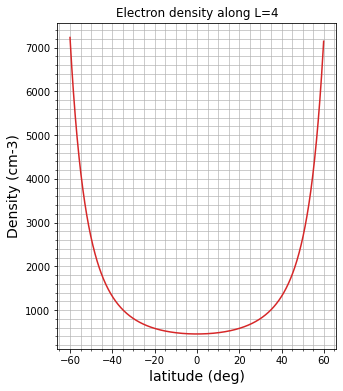

In [4]:
from environment_mod import densities_denton

lats_deg = np.arange(-60,60,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4
Kpmax=1
day=0
mlt=2
Rsun=90
ne_eq_L4=carpender_anderson(L_shell,Kpmax,day,mlt,Rsun)
ne_L4=[]

for i in range(0,len(lats_rad)):
    netmp=densities_denton(ne_eq_L4,lats_rad[i])
    ne_L4.append(netmp)
    
###Plot##############################################
fig, ax = plt.subplots(figsize=(5,6))
s=5
ax.set_title('Electron density along L=4')
ax.set_xlabel("latitude (deg)",fontsize=14)
ax.set_ylabel("Density (cm-3)",fontsize=14)

ax.plot(lats_deg,ne_L4,color="tab:red")

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_ylim([10**(-1), 10**6])
# ax.set_xlim([2,7])
ax.grid(True, which="both",alpha=.8)
plt.show()
###########################################################    

### 4. environment.densities_ozhogin
Routine to calculate the electron density along a magnetic field line after [Ozhogin et al., 2012]

$$n_{eq}(L)=10^{4.4693-0.1903*L}$$

$$n_e(L,\lambda)=n_{eq}(L) \cos^{-0.75} \Big(\frac{\pi}{2}\frac{\lambda}{\lambda_{inv}}\Big)$$

$$\lambda_{inv}=arccos\sqrt{\frac{1}{L}}$$

**Inputs**:

L_arg: Lshell

lamda_arg: geomagnetic latitude in rad



**Outputs**:

neqtmp: equatorial electron number density

n_lamtmp: electron number density at latitude

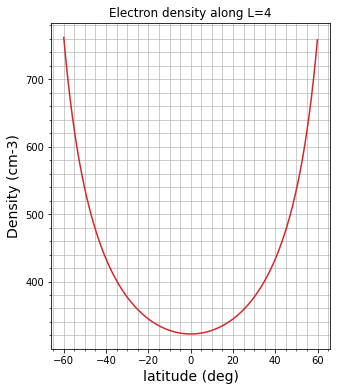

In [14]:
from environment_mod import densities_ozhogin

lats_deg = np.arange(-60,60,0.1)
lats_rad = np.deg2rad(lats_deg)
L_shell=4

ne_L4_ozh=[]
ne_eq_L4_ozh=[]
for i in range(0,len(lats_rad)):
    netmp=densities_ozhogin(L_shell,lats_rad[i])
    ne_L4_ozh.append(netmp[1])
    ne_eq_L4_ozh.append(netmp[0])
###Plot##############################################
fig, ax = plt.subplots(figsize=(5,6))
s=5
ax.set_title('Electron density along L=4')
ax.set_xlabel("latitude (deg)",fontsize=14)
ax.set_ylabel("Density (cm-3)",fontsize=14)

ax.plot(lats_deg,ne_L4_ozh,color="tab:red")

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

# ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_ylim([10**(-1), 10**6])
# ax.set_xlim([2,7])
ax.grid(True, which="both",alpha=.8)
plt.show()
###########################################################    



### 2. environment_mod.cyclotron


Routine to calculate the gyrofrequency of a particle
$$\Omega_{s}=\frac{q_s B}{m_s}$$

**Inputs**:

B_arg: Geomagnetic field strength in T

q_arg: particle charge in Cb

m_arg: particle mass in kg

**Outputs**:

omega_tmp: particle gyrofrequency in rad/s

fc_tmp: particle gyrofrequency in Hz


### 2. environment_mod.omega_plasma


Routine to calculate the plasma frequency
$$\omega_{ps}=\frac{N_{s}q_{s}^2}{\epsilon_{0}m_{s}}$$

**Inputs**:

n_arg: particle number density in $m^{-3}$

q_arg: particle charge in Cb

m_arg: particle mass in kg

**Outputs**:

omegap_tmp: plasma frequency in rad/s

fp_tmp: plasma frequency in Hz

### 3. environment_mod.omega_upper_hybrid

Routine to calculate the upper hybrid resonance frequency

$$\omega_{uh}=\frac{\omega_{ce}^2+\omega_{pe}^2+\omega_{ci}^2+\omega_{pi}^2}{2}+\frac{1}{2}\Bigg[ (\omega_{ce}^2+\omega_{pe}^2-\omega_{ci}^2-\omega_{pi}^2)^2 +4\omega_{pe}^2\omega_{pi}^2 \Bigg]$$

**Inputs**:
wce_arg: electron gyrofrequency 

wpe_arg: electron plasma frequency 

wci_arg: ion gyrofrequency 

wpi_arg: ion plasma frequency 

**Outputs**:

wuh_tmp: upper hybrid resonance frequency


### 4. environment_mod.omega_lower_hybrid

Routine to calculate the lower hybrid resonance frequency

$$\omega_{uh}=\frac{\omega_{ce}^2+\omega_{pe}^2+\omega_{ci}^2+\omega_{pi}^2}{2}-\frac{1}{2}\Bigg[ (\omega_{ce}^2+\omega_{pe}^2-\omega_{ci}^2-\omega_{pi}^2)^2 +4\omega_{pe}^2\omega_{pi}^2 \Bigg]$$

**Inputs**:
wce_arg: electron gyrofrequency 

wpe_arg: electron plasma frequency 

wci_arg: ion gyrofrequency 

wpi_arg: ion plasma frequency 

**Outputs**:

wuh_tmp: lower hybrid resonance frequency


In [6]:
from environment_mod import cyclotron, f_lower_hybrid,omega_lower_hybrid,omega_upper_hybrid, omega_plasma



In [7]:
# from environment_mod import *

from environment_mod import geo2geod
from environment_mod import carpender_anderson
# inspect.getfullargspec(geo2geod) 

from environment_mod import Bmag_dipole, cyclotron, f_lower_hybrid,omega_lower_hybrid,omega_upper_hybrid, omega_plasma
from environment_mod import densities_denton
inspect.getfullargspec(Bmag_dipole) 

FullArgSpec(args=['L_arg', 'lamda_arg'], varargs=None, varkw=None, defaults=None, kwonlyargs=[], kwonlydefaults=None, annotations={})

In [8]:
lat_geo = np.arange(-60,60,0.1)
lon_geo = np.empty(len(lat_geo))
lon_geo.fill(0)
alt_geo = np.empty(len(lat_geo))
alt_geo.fill(1000)
tmp=geo2geod(lat_geo,lon_geo,alt_geo)


#### Magnetic field along a field line

### frequencies

In [9]:
wce=cyclotron(Bmag,const.qe,const.me)[0]
wcH=cyclotron(Bmag,const.qi,const.mH)[0]
ne0=10*10**(-6)
ne=densities_denton(ne0,np.deg2rad(lat_geo))
wpe=omega_plasma(ne,const.qe,const.me)[0]
wpH=omega_plasma(ne,const.qi,const.mH)[0]

wuhr=omega_upper_hybrid(wce,wpe,wcH,wpH)
wlhr=omega_lower_hybrid(wce,wpe,wcH,wpH)

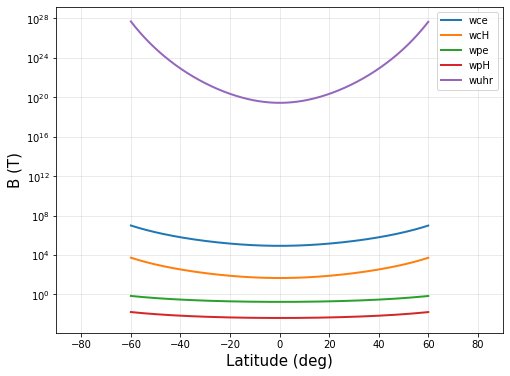

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
s=2
fonts=15
ax.plot(lat_geo,wce,label='wce',linewidth=s)
ax.plot(lat_geo,wcH,label='wcH',linewidth=s)
ax.plot(lat_geo,wpe,label='wpe',linewidth=s)
ax.plot(lat_geo,wpH,label='wpH',linewidth=s)
ax.plot(lat_geo,wuhr,label='wuhr',linewidth=s)
# ax.plot(lat_geo,wlhr,label='wlhr',linewidth=s)

ax.set_yscale('log')
ax.grid(alpha=.3)
ax.set_xlim(-90,90)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'B (T)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()